In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Create $n\times 2$-dimensional array $X$  by sampling from $2$-dimensional Gaussian distribution with zero mean and covariance matrix $\Sigma$: $N(0,\Sigma)$. 

Label the examples $X_i\in\mathbb R^2$ as follows: if $\|X_i\|_2>1$, then $y_i=1$ with probability $q$ and $y_i=0$ with probabilty $1-q$. Otherwise, $y_i=0$ with probability $q$ and $y_i=1$ with probabilty $1-q$.

(Take, e.g., $n=1000$, $q=0.9$)

Hint: use `np.random.multivariate_normal`, `np.random.choice`, `np.linalg.norm`.

In [72]:
mean=[0,0]
cov=[[1,0],[0,1]]
n=1000
q=0.9
x = np.random.multivariate_normal(mean, cov, n)
print(x)
means = np.linalg.norm(x,axis=1)
y = np.zeros(n)
for i in range(n):
    if means[i] > 1:
        y[i] = np.random.choice([1, 0], p = [q, 1-q])
    else:
        y[i] = np.random.choice([1, 0], p = [1-q, q])
print(y)

[[-1.59532454 -0.20106815]
 [ 0.10304157  0.95562927]
 [ 0.64081641  0.07985095]
 ...
 [-1.43441576  0.41971539]
 [ 0.17478483 -0.60388454]
 [ 1.82553704 -1.23928747]]
[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0

Make the scatter plot for the components of $X$. Select different markers for the labels $0$ and $1$.

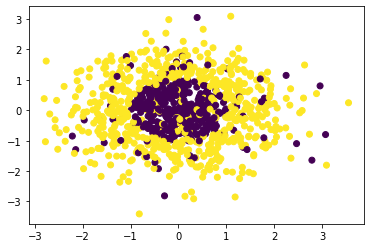

In [73]:
plt.subplots(figsize=(6,4))
plt.scatter(x[:,0],x[:,1],c = y)

What is the proportion of examples, belonging to the positive class?

In [74]:
print(sum(y)/n)

0.609


0.559

Make a train-test split, using `train_test_split` with `random_state=1`. 

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

Define the lists `training_accuracy`, `test_accuracy` (you can use arrays instead).

For the number of neighbors in $\{1,\dots,\max_n\}$ (e.g., $\max_n=200$)

1. Train the KNeighborsClassifier on the training set by using the `fit` method.
2. Make prediction for the training and validation sets and append the scores (accuracies) to the lists `training_accuracy`, `test_accuracy`.
3. Print the first 10 entries of these lists.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
max_n = 200
neighbors = range(1, max_n)
for i in neighbors:
    KNC = KNeighborsClassifier(n_neighbors = i)
    model = KNC.fit(x_train, y_train)
    training_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))
print(training_accuracy[:10])
print(test_accuracy[:10 ])

[1.0, 0.9, 0.906, 0.9, 0.896, 0.884, 0.892, 0.882, 0.89, 0.88]
[0.798, 0.77, 0.858, 0.844, 0.868, 0.854, 0.868, 0.858, 0.868, 0.858]


training_accuracy:
 [1.0, 0.896, 0.9026666666666666, 0.888, 0.8853333333333333, 0.884, 0.8893333333333333, 0.88, 0.88, 0.876]
test_accuracy:
 [0.84, 0.836, 0.868, 0.852, 0.88, 0.88, 0.888, 0.896, 0.9, 0.888]


Plot the graphs of the training and test accuracies against the number of neighbors (use `.xlabel`, `.ylabel`, `legend`). Do you see underfitting and overfitting?

Text(0, 0.5, 'Accuracy')

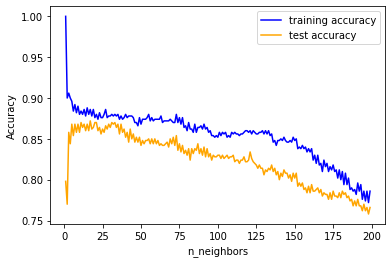

In [77]:
fig, axes = plt.subplots(figsize=(6, 4))
axes.plot(neighbors, training_accuracy, color = 'blue')
axes.plot(neighbors, test_accuracy, color = 'orange')
axes.legend(['training accuracy','test accuracy'])
axes.set_xlabel('n_neighbors')
axes.set_ylabel('Accuracy')

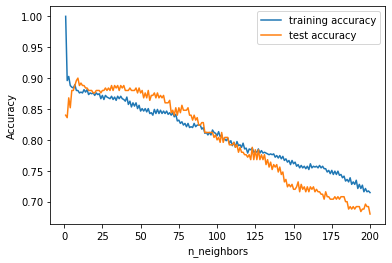

Print the maximal training and test accuracies.

In [78]:
print('maximal training accuracy ', np.max(training_accuracy))
print('maximal test accuracyy ', np.max(test_accuracy))

maximal training accuracy  1.0
maximal test accuracyy  0.872


maximal training accuracy 1.0 
maximal test accuracy 0.9


Find the best predictor and print its training and test scores (use `np.asarray(test_accuracy)` to convert list to array if needed). 

In [79]:
max_values = np.argmax(test_accuracy)
print("best number of neighbors ", neighbors[max_values])
print("training accuracy ", training_accuracy[max_values])
print("test accuracy ", test_accuracy[max_values])

best number of neighbors  17
training accuracy  0.886
test accuracy  0.872


best number of neighbors 8 
training accuracy 0.88 
test accuracy 0.9


Plot the decision boundaries for the number of neighbors = 1, 3, 8, 200. The following code is due to Muller & Guido. However, you should import the module plots.plot_2d_separator from the module mglearn, created by Muller & Guido.

In [ ]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=43a2700a0b5bd60bd24801f0a34bcb8020455864844e5fadee14f55128740643
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


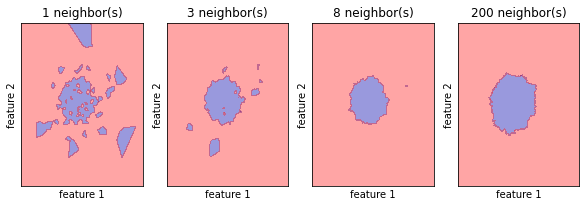

In [80]:
import mglearn
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 8, 200], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(clf, x_train, fill=True, ax=ax, alpha=.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

In [81]:
# Recall, how the meshgrid works
a=np.array([0,1,2])
b=np.array([0,2,4,6])
za,zb=np.meshgrid(a,b)
print('array of the first coordinates of all points of the grid:\n',za)
print('array of the second coordinates o all points of the grid:\n',zb)
# some function
def f(x,y):
    return x+y
# computing the function on the grid
f(za,zb)

array of the first coordinates of all points of the grid:
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
array of the second coordinates o all points of the grid:
 [[0 0 0]
 [2 2 2]
 [4 4 4]
 [6 6 6]]


array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

Using meshgrid and pcolormesh make plot the decision boundaries by yourself. Similar examples can be found in the `scikit-learn` documentation.

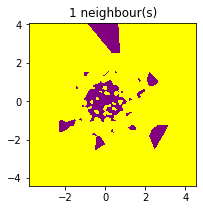

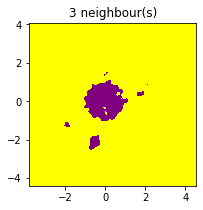

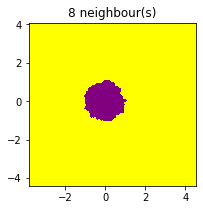

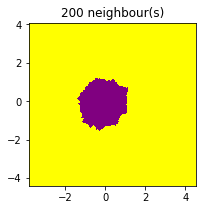

In [83]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

h = 0.025  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["purple", "yellow"])

for n_neighbors in [1, 3, 8, 200]:
    # we create an instance of Neighbours Classifier and fit the data.
    KNC = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    KNC.fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = KNC.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(3, 3))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.title("%i neighbour(s)" % (n_neighbors))

    # Plot also the training points
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title

plt.show()

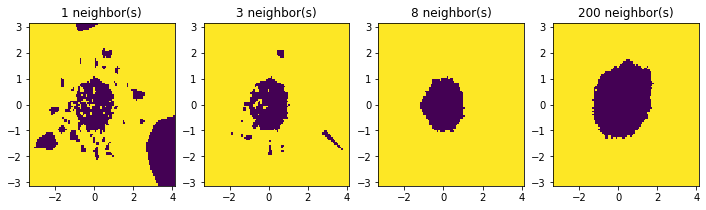

## Part 2.

Select the best number of neighbors by cross validation.

1. Import `GrigSearch` from `sklearn.model_selection`
2. Print possible hyperparameters for `KNeighborsClassifier()` by the method `.get_params().keys())`
3. Perform `GridSearchCV` with `cv=10` folds for the number of neighbors in $\{1,\dots,50\}$.
4. Print the best number of neighbors, and the scores of the respected KNN classifier.

In [84]:
from sklearn.model_selection import GridSearchCV
KNC = KNeighborsClassifier()
KNC.get_params().keys()
parameters = {'n_neighbors': [i for i in range(1,51)],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan'],'n_jobs': [-1]}
GSCV = GridSearchCV(KNC, parameters, cv = 10)
GSCV.fit(x_train, y_train)
GSCV.best_score_
print("dict_keys: ",GSCV.best_estimator_)
print("train score: ", GSCV.score(x_train,y_train))
print("test score: ", GSCV.score(x_test,y_test))

dict_keys:  KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=13,
                     weights='distance')
train score:  1.0
test score:  0.874


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
{'n_neighbors': 13}
train score: 0.8813333333333333
test score: 0.888


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For more information on the next exersize see *Albon 11.11*. 

Evaluate the effect of the number of observations in the training set on the learning process, using `learning_curve` from the module `sklearn.model_selection`. For 20 neighbors call it with `train_sizes=np.linspace(0.1, 1.0, 100)`
and fill the arrays `train_sizes`, `train_scores`, `validation_scores`.

In [85]:
from sklearn.model_selection import learning_curve

In [86]:
KNC = KNeighborsClassifier(n_neighbors = 20)
train_sizes, train_scores, validation_scores = learning_curve(
estimator = KNC,
X = x_train,
y = y_train, 
train_sizes = np.linspace(0.1, 1.0, 100), 
cv = 10,
scoring = 'neg_mean_squared_error')
print(train_sizes[:10],end = '\n\n')
print(train_scores[:10],end = '\n\n')
print(validation_scores[:10],end = '\n\n')

[45 49 53 57 61 65 69 73 77 81]

[[-0.37777778 -0.37777778 -0.37777778 -0.37777778 -0.37777778 -0.37777778
  -0.37777778 -0.37777778 -0.37777778 -0.37777778]
 [-0.34693878 -0.3877551  -0.3877551  -0.3877551  -0.3877551  -0.3877551
  -0.3877551  -0.3877551  -0.3877551  -0.3877551 ]
 [-0.33962264 -0.37735849 -0.37735849 -0.37735849 -0.37735849 -0.37735849
  -0.37735849 -0.37735849 -0.37735849 -0.37735849]
 [-0.31578947 -0.42105263 -0.38596491 -0.38596491 -0.38596491 -0.38596491
  -0.38596491 -0.38596491 -0.38596491 -0.38596491]
 [-0.27868852 -0.42622951 -0.32786885 -0.32786885 -0.32786885 -0.32786885
  -0.32786885 -0.32786885 -0.32786885 -0.32786885]
 [-0.30769231 -0.35384615 -0.27692308 -0.27692308 -0.27692308 -0.27692308
  -0.27692308 -0.27692308 -0.27692308 -0.27692308]
 [-0.27536232 -0.28985507 -0.30434783 -0.30434783 -0.30434783 -0.30434783
  -0.30434783 -0.30434783 -0.30434783 -0.30434783]
 [-0.24657534 -0.2739726  -0.30136986 -0.30136986 -0.30136986 -0.30136986
  -0.30136986 -0.30

Number of scores in each row of `train_scores`, `validation_scores` coincides with the number of folds in cross validation. So form the arrays of means `train_mean`, `validation_mean`.

In [87]:
train_mean = np.mean(train_scores,axis=1)
validation_mean = np.mean(validation_scores,axis=1)
print(train_sizes.shape,train_scores.shape,validation_scores.shape)
print(train_mean.shape, validation_mean.shape)

(100,) (100, 10) (100, 10)
(100,) (100,)


In [88]:
print(train_sizes.shape,train_scores.shape,validation_scores.shape)

(100,) (100, 10) (100, 10)


Plot `train_mean`, `validation_mean` against `train_sizes`. 

Text(0, 0.5, 'score')

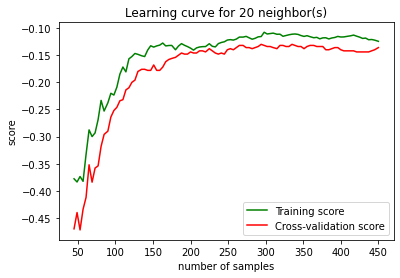

In [89]:
fig, axes = plt.subplots(figsize=(6, 4))
axes.plot(train_sizes,train_mean, color = 'green')
axes.plot(train_sizes,validation_mean, color = 'red')
axes.legend(['Training score','Cross-validation score'])
axes.set_title('Learning curve for 20 neighbor(s)')
axes.set_xlabel('number of samples')
axes.set_ylabel('score')

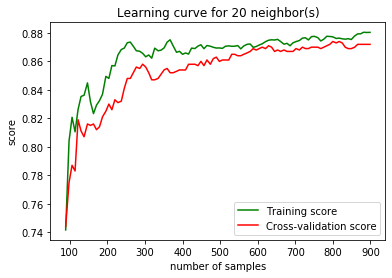

Tune the parameters of the SVC, using GridSearchfor for 10 folds and

`hyperparameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}`

Print the best parameter values and the scores of the respected SVC classifier.

In [92]:
from sklearn.svm import SVC
SVC = SVC()
hyperparameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
GSCV = GridSearchCV(SVC, hyperparameters, cv = 10)
GSCV.fit(x_train, y_train)
print(SVC.get_params().keys())
print("Best parameters: ", GSCV.best_params_)
print("train score: ", GSCV.score(x_train,y_train))
print("test score:", GSCV.score(x_test,y_test))

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters:  {'C': 1, 'gamma': 1}
train score:  0.9
test score: 0.876


dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters: {'C': 1, 'gamma': 1}
train score: 0.8866666666666667
test score: 0.9


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
